In [11]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [12]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [13]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [14]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [15]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
models = np.array_split(train_data, 10)
train_x=[]
train_y=[]
for model_num in range(10):
    train_x.append(models[model_num][:, 0])
    train_y.append(models[model_num][:, 1])
train_x =np.array(train_x)
train_y=np.array(train_y)
bias=[]
vari=[]
err=[]
ierr=[]

In [16]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [20]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)**2))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        ierr.append(np.mean(err_mean- (mean_point_over_10 - test_y)**2 - var_point_over_10))
        err.append(np.mean(err_mean))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias square": bias,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [21]:
table = bias_var()

[1249898.92664811   73585.1979682   245390.44104618   70286.10543569
 1108543.95682344   87388.45447661 1728445.06763826  439123.60244764
  638835.73679185  538471.86392649   53714.93331302  439594.35739644
  188597.74213254  368042.29599501 2466401.40201195   77511.31121519
   51119.77121382  161730.03324302 6393149.22169227   28137.26832678
   22114.31570422  488891.47223146   28970.43322583  252649.76794059
   94371.99230903   40848.95899505  508223.93879663  816679.61813452
 5016640.95122756  471358.21023739 5125773.28472083 1234544.89637928
   42031.29362496 1024010.31665317  812918.75840503 2381995.48589531
  372056.24297194 1100588.96454582  261110.05453516  487720.97121482
   70196.56372372  368806.88274033 4877989.35996425  794175.24870551
 1924281.31892962 1174296.11807377  767018.91184103  582163.07036245
 1079079.39766853 2529060.08075641 2972095.42375273 1009979.9893809
  550974.62870313 1210943.52309531  643825.57140819  556651.90859162
 1184836.65356516 1189680.07502562 

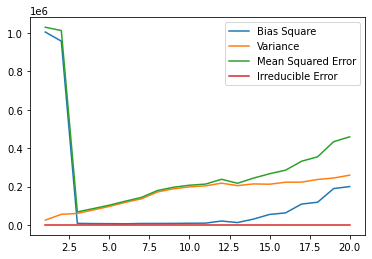

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(1,21)),table["Bias square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()